<a href="https://colab.research.google.com/github/WetsuiteLeiden/example-notebooks/blob/main/research-methods/methods_technical__pdf_part1__extract_or_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# (only) in colab, run this first to install wetsuite from (the most recent) source.   For your own setup, see wetsuite's install guidelines.
!pip3 install wetsuite -U

## Purpose of this notebook

Explain how to take a PDF, and end up with the plain text it contains:

Or, a little more precisely:
- determining whether a PDF contains embedded text

- to extract text from PDFs if we can

- to OCR it where we cannot (OCR being detecting characters/words in images)

- to polish the output of OCR, if that is reasonable

<!--
- The basic way would be to ask the PDF - many PDFs contain a layer that
  contains the text that it thinks it's drawing.
  This will be present if it comes from an office suite, or if the PDF was previously OCR'd.

- Quite a few PDFs do not contain such a layer, or only partially do,
  e.g. if it was scanned but not OCR'd.
  We explain how to detect that lack of text, and how to apply some OCR to still get the text.
-->

### Is your goal something else?

Note that these notebooks focus _only_ on extracting plain text,
to then then immediately forget about the PDF file it came from. 

We can think of various cases where, instead, you want to 
take a PDF file without text layer, OCR it and add that as a text layer, and save it.

That is, enriching the set of PDFs you are working on in this way gives you the flexibility
to then feed this into anything else, be it a PDF indexer, or even just a PDF-reading tool
that has spent more attention (than another) on extracting the the contained as structured text.

In such cases, you may want to ignore this notebook, 
and instead look at _software_ that can do that for you, such as [OCRmyPDF](https://ocrmypdf.readthedocs.io/en/latest/) and similar.

Note also that there are varied _products and services_ out there that offer that,
but in a friendlier "put document-like things here, we make it easy to search", 
e.g. document managers such as [documentcloud](https://www.documentcloud.org/app), 
and investigative platforms like Aleph. (TODO: list more)

- When these apply to your projects, they may be much lower-worry _and_ may
  scale better than figuring this out yourself.

- Some are meant for publication of those document (so not an option when your data is not public),
  others very much not (e.g. aimed at journalists who want to wade through a mass of documents sent to them).

- Few give you much control over results quality, though, so the below is an example of doing it yourself,
  and there is a more complex example linked below (right after an example of why you might want that).

### Context on government data

There are obligations that say that government data should be available in the most machine-readable form available,
yet what that form actually is will depend on context and case.

While sometimes that means a near-data form (e.g. XML with semantic, case-specific data), 
sometimes that is an office-document form, PDF of varied quality, HTML with or without structure,
or some combination of the above.

The more structured data is generally our preference to work with where it appears, 
but but some things are only available only as PDF.
Giving you some start with these is why this notebook is here.

### Context on PDFs

**PDFs don't necessarily contain good text, or text at all**

Contrary to popular belief, PDFs are not a document format.

A PDF is only required to draw, whether that be on a screen or on a piece of paper.
It turns out knowing what text tey are embedding is optional.

Many do know what text they are drawing.
Some flavours of PDF (like PDF/A for archiving, and PDF/UA for Universal Accessibility)
more or less _require_ it -- but few of the government PDFs _are_ PDF/A or PDF/UA.


And it would still not guarantee clean, accurate, polished, natural-flowing text.
There is the case of 'drawn text looks good but the copied text is just plain garbled'.
There is also a grab-bag of 'close buit not quite' cases,
from visually close (e.g. O versus 0), 
to things like "B e s c h ik k in g va n de M in is te r van J u s titie" 
which is technically ''all'' the right _characters_,
but the spaces still make it really had to use.

The reasons for this depend largely on the source. 
Say, a PDF generated from an office document will often be very good.

If it comes from the scanner down the hall, it contains no text - just pictures of text,
and probably no OCR. Or maybe some not-very-good OCR.

In the last cases, we may wish to turn PDFs to text ourselves,
just because the attention we pay will make for better text.

## Note on perfectionism

**Layout in PDF text and/or OCR**

In some ways, both embedded PDF text and OCR output are very similar:
they say "this rectangle in the document contained this text".

You will get a set of dozens of those per page.
No layout information, just fragments of text and positions. 
Even if the text is perfectly accurate to what it said originally,
you still can't necessarily say anything about the document,
headers, footers, double columns, etc.

Is that text in what you might call natural reading order, considering all of those?
If you care about that, you will have to do that yourself, or find code or products that do.


**Think about whether you need that or not**

How much work there is to be done depends on what you're doing wit the output.

If you're only detecting the presence of words, 
e.g. to find documents them by contents,
then text of any sort will already go a long way,
and a few lines of code are all you need.

If you want perfectly natural flowing text, you will need to do a little more

<!--

## Potentials

And you will have to polish it _anyway_ if you want to be able to do things like 
* layouting - regular word-style documents can have text fragments appended based on coordinates, but e.g. multiple columns take more care
* recognize characters OCR got wrong (particularly structural mistakes we could fix automatically)
* recognize too many or too few spaces (e.g. coming from kerning details)
* combine fragments into sentences, 
* separating paragraphs,
* recognizing and separating/removing headers and footers
* recognize hyphenation between sentences
* recognize and extract tables


When the input is OCR, all of that needs to be done from fragments of text and their positions.

It's one of those problems where it's relative easy to get 80% of the way, 
and the last few percents are a pain.

Ideally, we have an easy way to verify, score, and fix OCR output.

This may involve storing
* Page images (rendered PDF, pre-OCR)
* raw output: fragments with positions
* raw output with metadata e.g. 'probably header'
* plain text with layouting like the original 
* text with


## To look at

* pdftotext (part of Xpdf and Poppler)
  * command line tool, extracts text and considers layouting 

* PDFMiner 
  * TODO: look at

* PyPDF2
  * parses object structure and can extract text. Documentation suggests it is currently relatiely basic.

* unpaper
  * prepares image for OCR, e.g. removing shadow corners common in photographs
  * https://github.com/unpaper/unpaper

* https://pypi.org/project/dehyphen/
  * an its use of perpexity? (and flairNLP?) 

* pytesseract
  * TODO: look at

* TICCL (Text-Induced Corpus Clean-up) / PICCL
  * Statistical word corrector based on a corpus
  * TODO: look at
  https://github.com/LanguageMachines/PICCL

* https://github.com/proycon/tscan


## Unsorted

https://www.clarin.eu/resource-families/tools-normalisation




This is provided in part as expectation management about 
  ease of use and output quality of modern OCR.

Keep in mind that OCR is not considered core feature, 
  is currently a thin wrapper around something else,
  and is likely to change in the future (e.g. tesseract may be more future-compatible than easyocr).
  Also consider that services like google vision are better-quality, but paid-for and may not be GDPR-compatible, etc. A summary of such details may be useful.
-->

## Getting to some code examples

In [3]:
import wetsuite.helpers.net
import wetsuite.helpers.format
import wetsuite.extras.pdf
import wetsuite.extras.ocr

### Notice and decide that we need OCR

In [ ]:
# fetch a cherry-picked example PDF file
example_pdf_bytes = wetsuite.helpers.net.download('https://open.overheid.nl/documenten/ronl-5439f4bf9849a53e634389ebbb5e4f5740c4f84f/pdf')

In [3]:
# Extract text from PDF

pages_text = list(  wetsuite.extras.pdf.page_text( example_pdf_bytes )  ) # this produces flat text, no further structure
for page_text in pages_text:
    print( '#################################################################' )
    print( page_text.strip() )

#################################################################
> Retouradres Postbus 40219 8004 DE Zwolle 
  
 
 
 
Rijksdienst voor 
Ondernemend Nederland 
Vergunningen en handhaving 
  
Mandemaat 3, Assen 
Postbus 40219 
8004 DE Zwolle 
www.rvo.nl 
 
Contactpersoon 
 
Woo-medewerker 
  
T 0880 42 4242 
woo-unit@rvo.nl 
    
Onze referentie 
Woo/2023/035 
 
Datum 29 maart 2023 
Betreft Beslissing op verzoek Woo/2023/035 
 
Bijlagen 
2 
Relatienummer 
 
  
  
  
  
  
 
 
 
 
 
 
 
 
 
 
Geachte heer 
, 
 
 
 
Op 15 februari 2023 heb ik uw verzoek ontvangen waarin u vraagt om 
openbaarmaking van informatie. In deze brief leest u mijn reactie op uw verzoek. 
 
Uw verzoek 
U vraagt om openbaarmaking van informatie over de definitieve 
investeringsverklaring(en) verleend in verband met de verbouw van 220 woningen 
met projectnummer RVVN200264. 
 
Procedure 
De ontvangst van uw verzoek is schriftelijk bevestigd bij brief van  
17 februari 2023 met kenmerk Woo/2023/035. In deze brief is 

Looks like text, right?

Yes, but notice what happened there at te end.
There seem to be empty pages.

It turns out this is a PDF with two sections-of-sorts: seven pages of document with hundreds of words per page, 
and then proably a buch of scanned pages without an according PDF text layer.

Another way to check/estimate such shortcomings:

In [11]:
chars_per_page, num_pages_with_text, num_pages = wetsuite.extras.pdf.count_pages_with_text(example_pdf_bytes, char_threshold=200)

print( f'Characters per page: {chars_per_page}\n' )
print( f'So {num_pages_with_text} out of {num_pages} pages contain reasonable amount of text')

Characters per page: [1612, 2797, 816, 643, 2479, 2684, 481, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

So 11 out of 20 pages contain reasonable amount of text


### Go the other way: PDF to image, image to text

OCR takes images as input, so now we want the PDF as images.

We _could_ skip the pages we alreay have text for (they're probably decent quality), and save some processing time,
but it's less _code_ (though more analysis time) to see what it makes of all the pages.

(It's also potentially a good double-check of the existing OCR to see that the PDF's text matches what OCR extracts)

In [12]:
page_images = list( wetsuite.extras.pdf.pages_as_images(example_pdf_bytes, dpi=200) )
# Note: in general you should do this one at a time, generator-style, or a 300-page document will make your computer cry via large amounts of memory use.
# In this case, that list() rendering all before we continue is fine, and should take a few seconds.

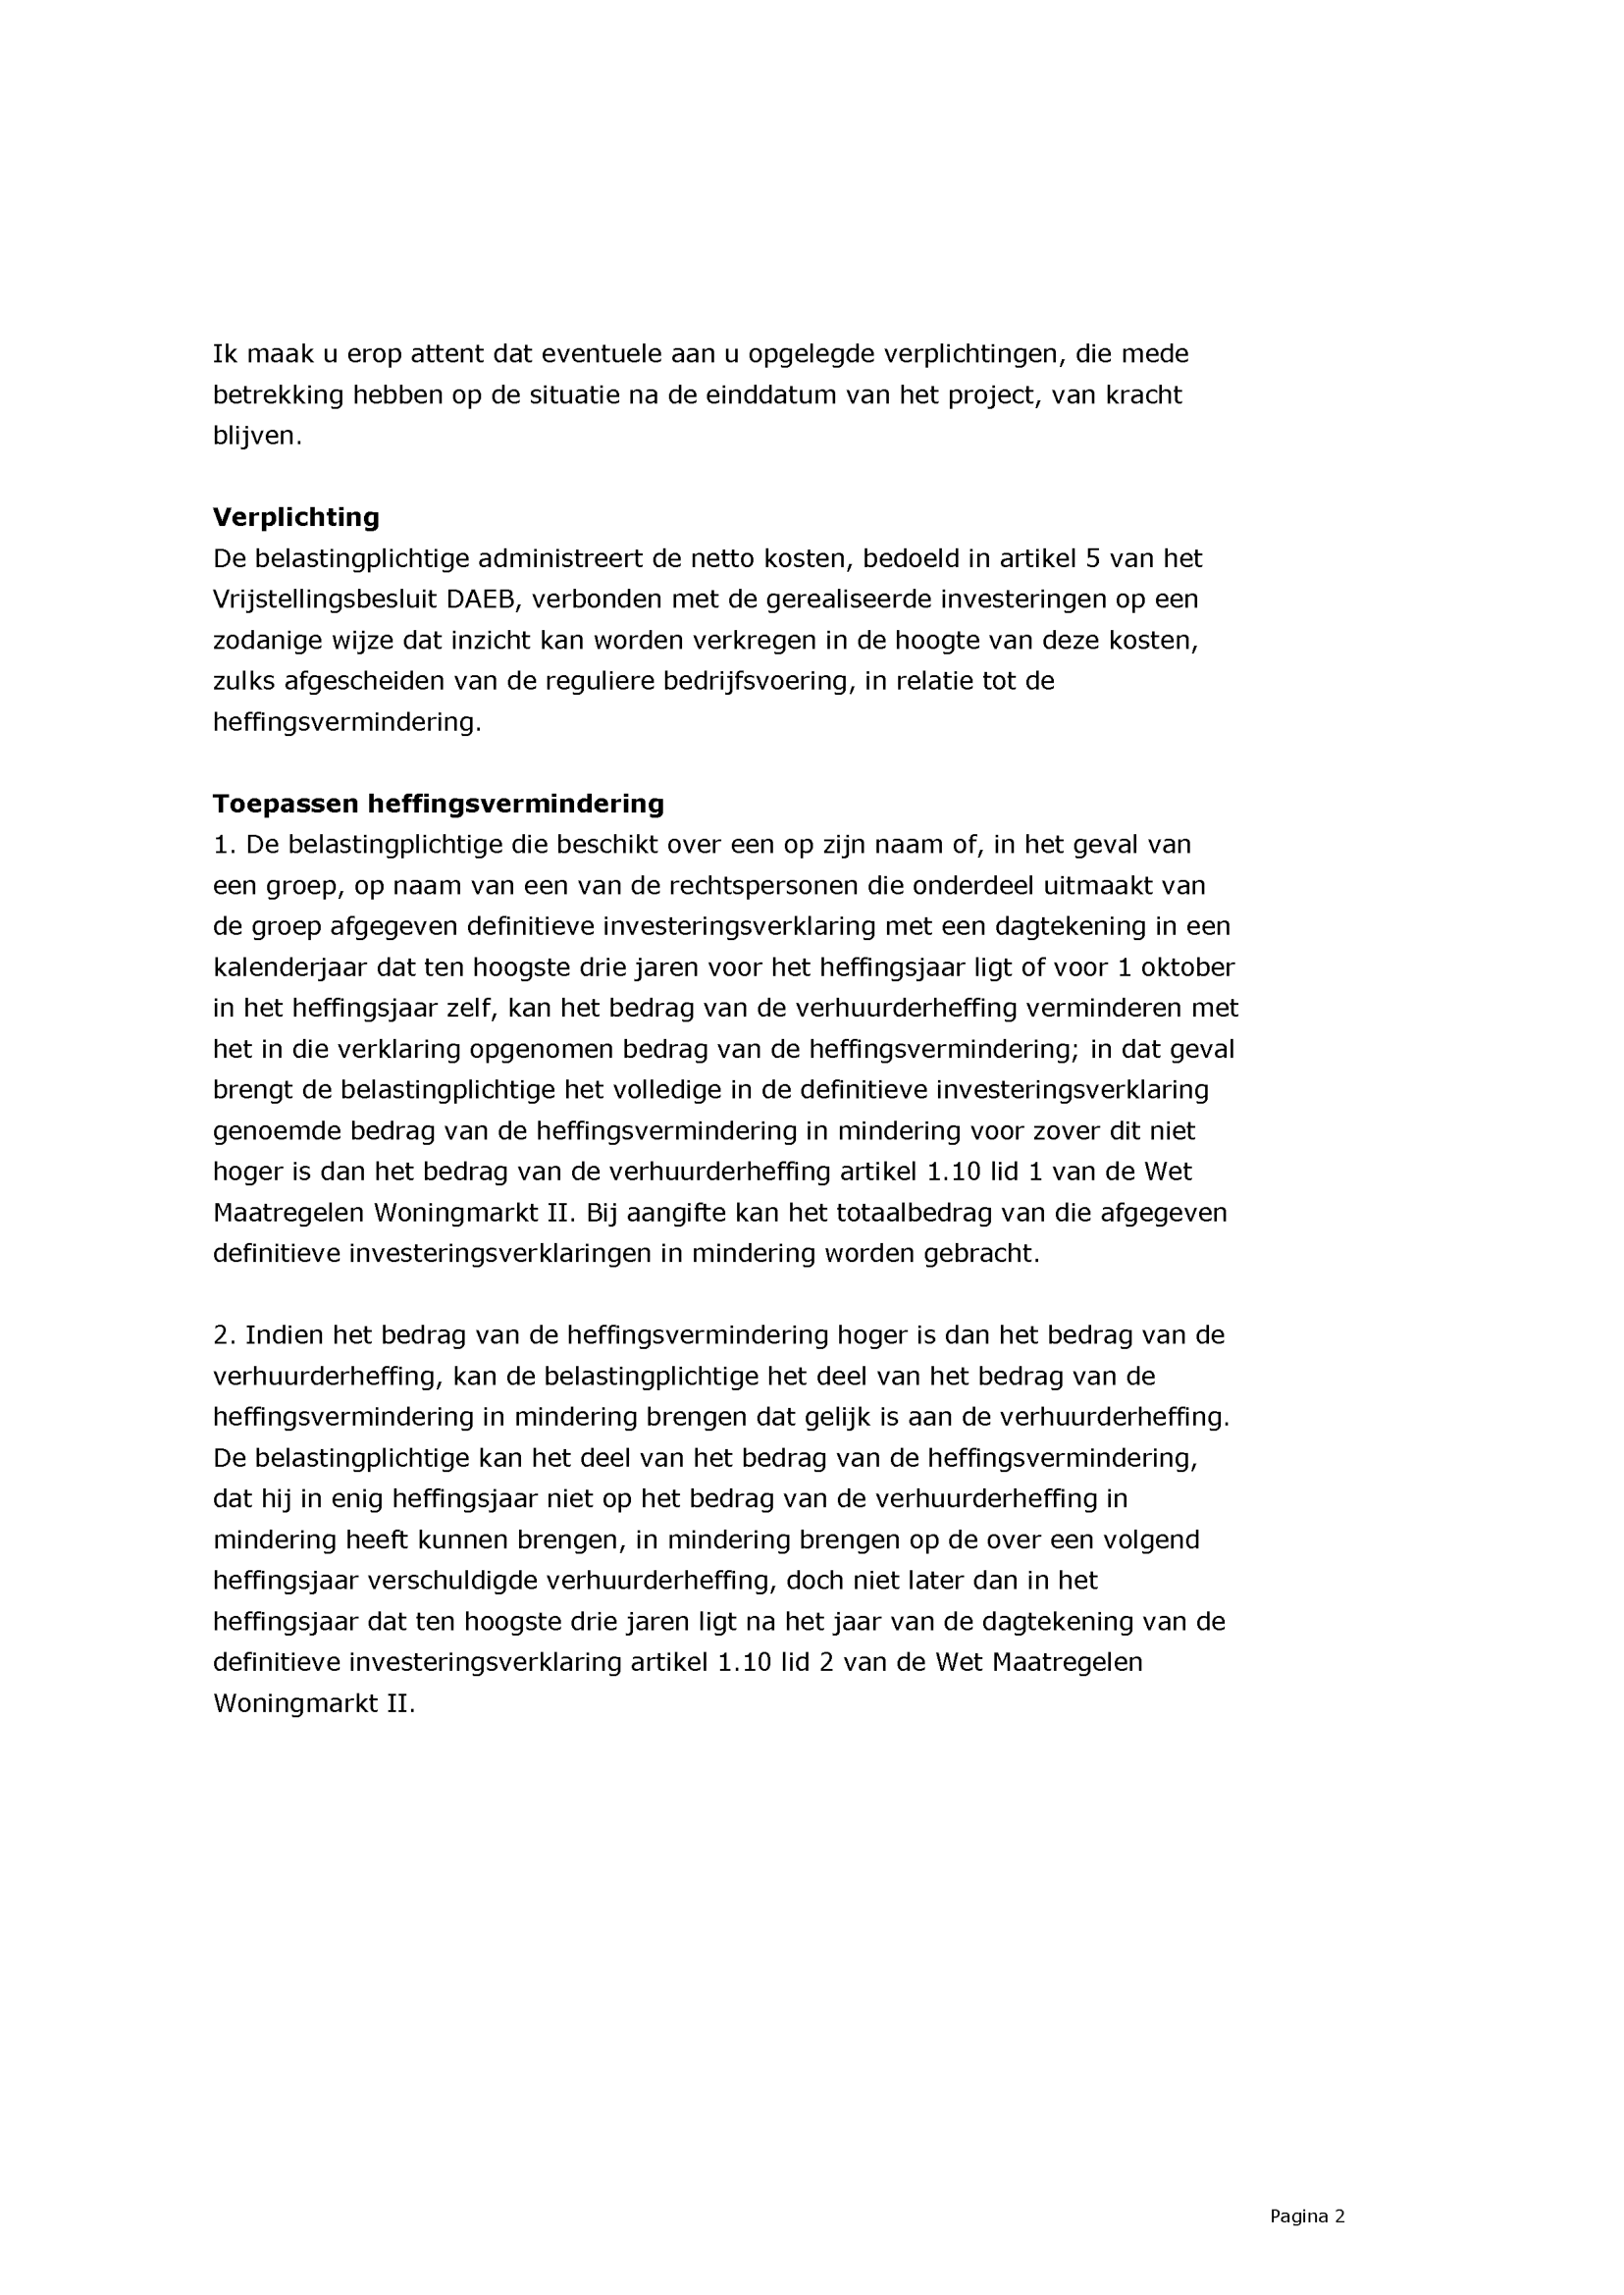

In [13]:
# show us the second page we didn't get text for
#   (notebooks treat PIL images by showing them. In practice you might .save() them instead)
chosen_example_image = page_images[8]
chosen_example_image   

In [ ]:
page_ocr_results = wetsuite.extras.ocr.easyocr( chosen_example_image, use_gpu=True ) 
# if GPU fails, use False,  though it'll be slower.
#  Even on GPU it'll take a minute, and despite that _some_ of that is initial loading,
#     the same on CPU will probably take a few times as long.

In [24]:
# what did that produce?
page_ocr_results

[([(213, 343), (1217, 343), (1217, 383), (213, 383)],
  'Ik maak u erop attent dat eventuele aan u opgelegde verplichtingen, die mede',
  0.6823283176928038),
 ([(212, 383), (1211, 383), (1211, 423), (212, 423)],
  'betrekking hebben op de situatie na de einddatum van het project, van kracht',
  0.7366969956685622),
 ([(214, 430), (308, 430), (308, 462), (214, 462)],
  'blijven.',
  0.970737011570096),
 ([(214, 508), (391, 508), (391, 549), (214, 549)],
  'Verplichting',
  0.988003375277293),
 ([(215, 553), (1233, 553), (1233, 591), (215, 591)],
  'De belastingplichtige administreert de netto kosten, bedoeld in artikel 5 van het',
  0.6219529329008259),
 ([(213, 591), (1225, 591), (1225, 632), (213, 632)],
  'Vrijstellingsbesluit DAEB, verbonden met de gerealiseerde investeringen op een',
  0.7856826090511339),
 ([(213, 635), (1227, 635), (1227, 674), (213, 674)],
  'zodanige wijze dat inzicht kan worden verkregen in de hoogte van deze kosten,',
  0.7137132163974219),
 ([(213, 675), (1

That's OCR results in relatively raw form, namely fragments of:
- the bounds of the box that contains this fragment of text
- the text detected inside that box
- how certain the underlying OCR engine was about this text

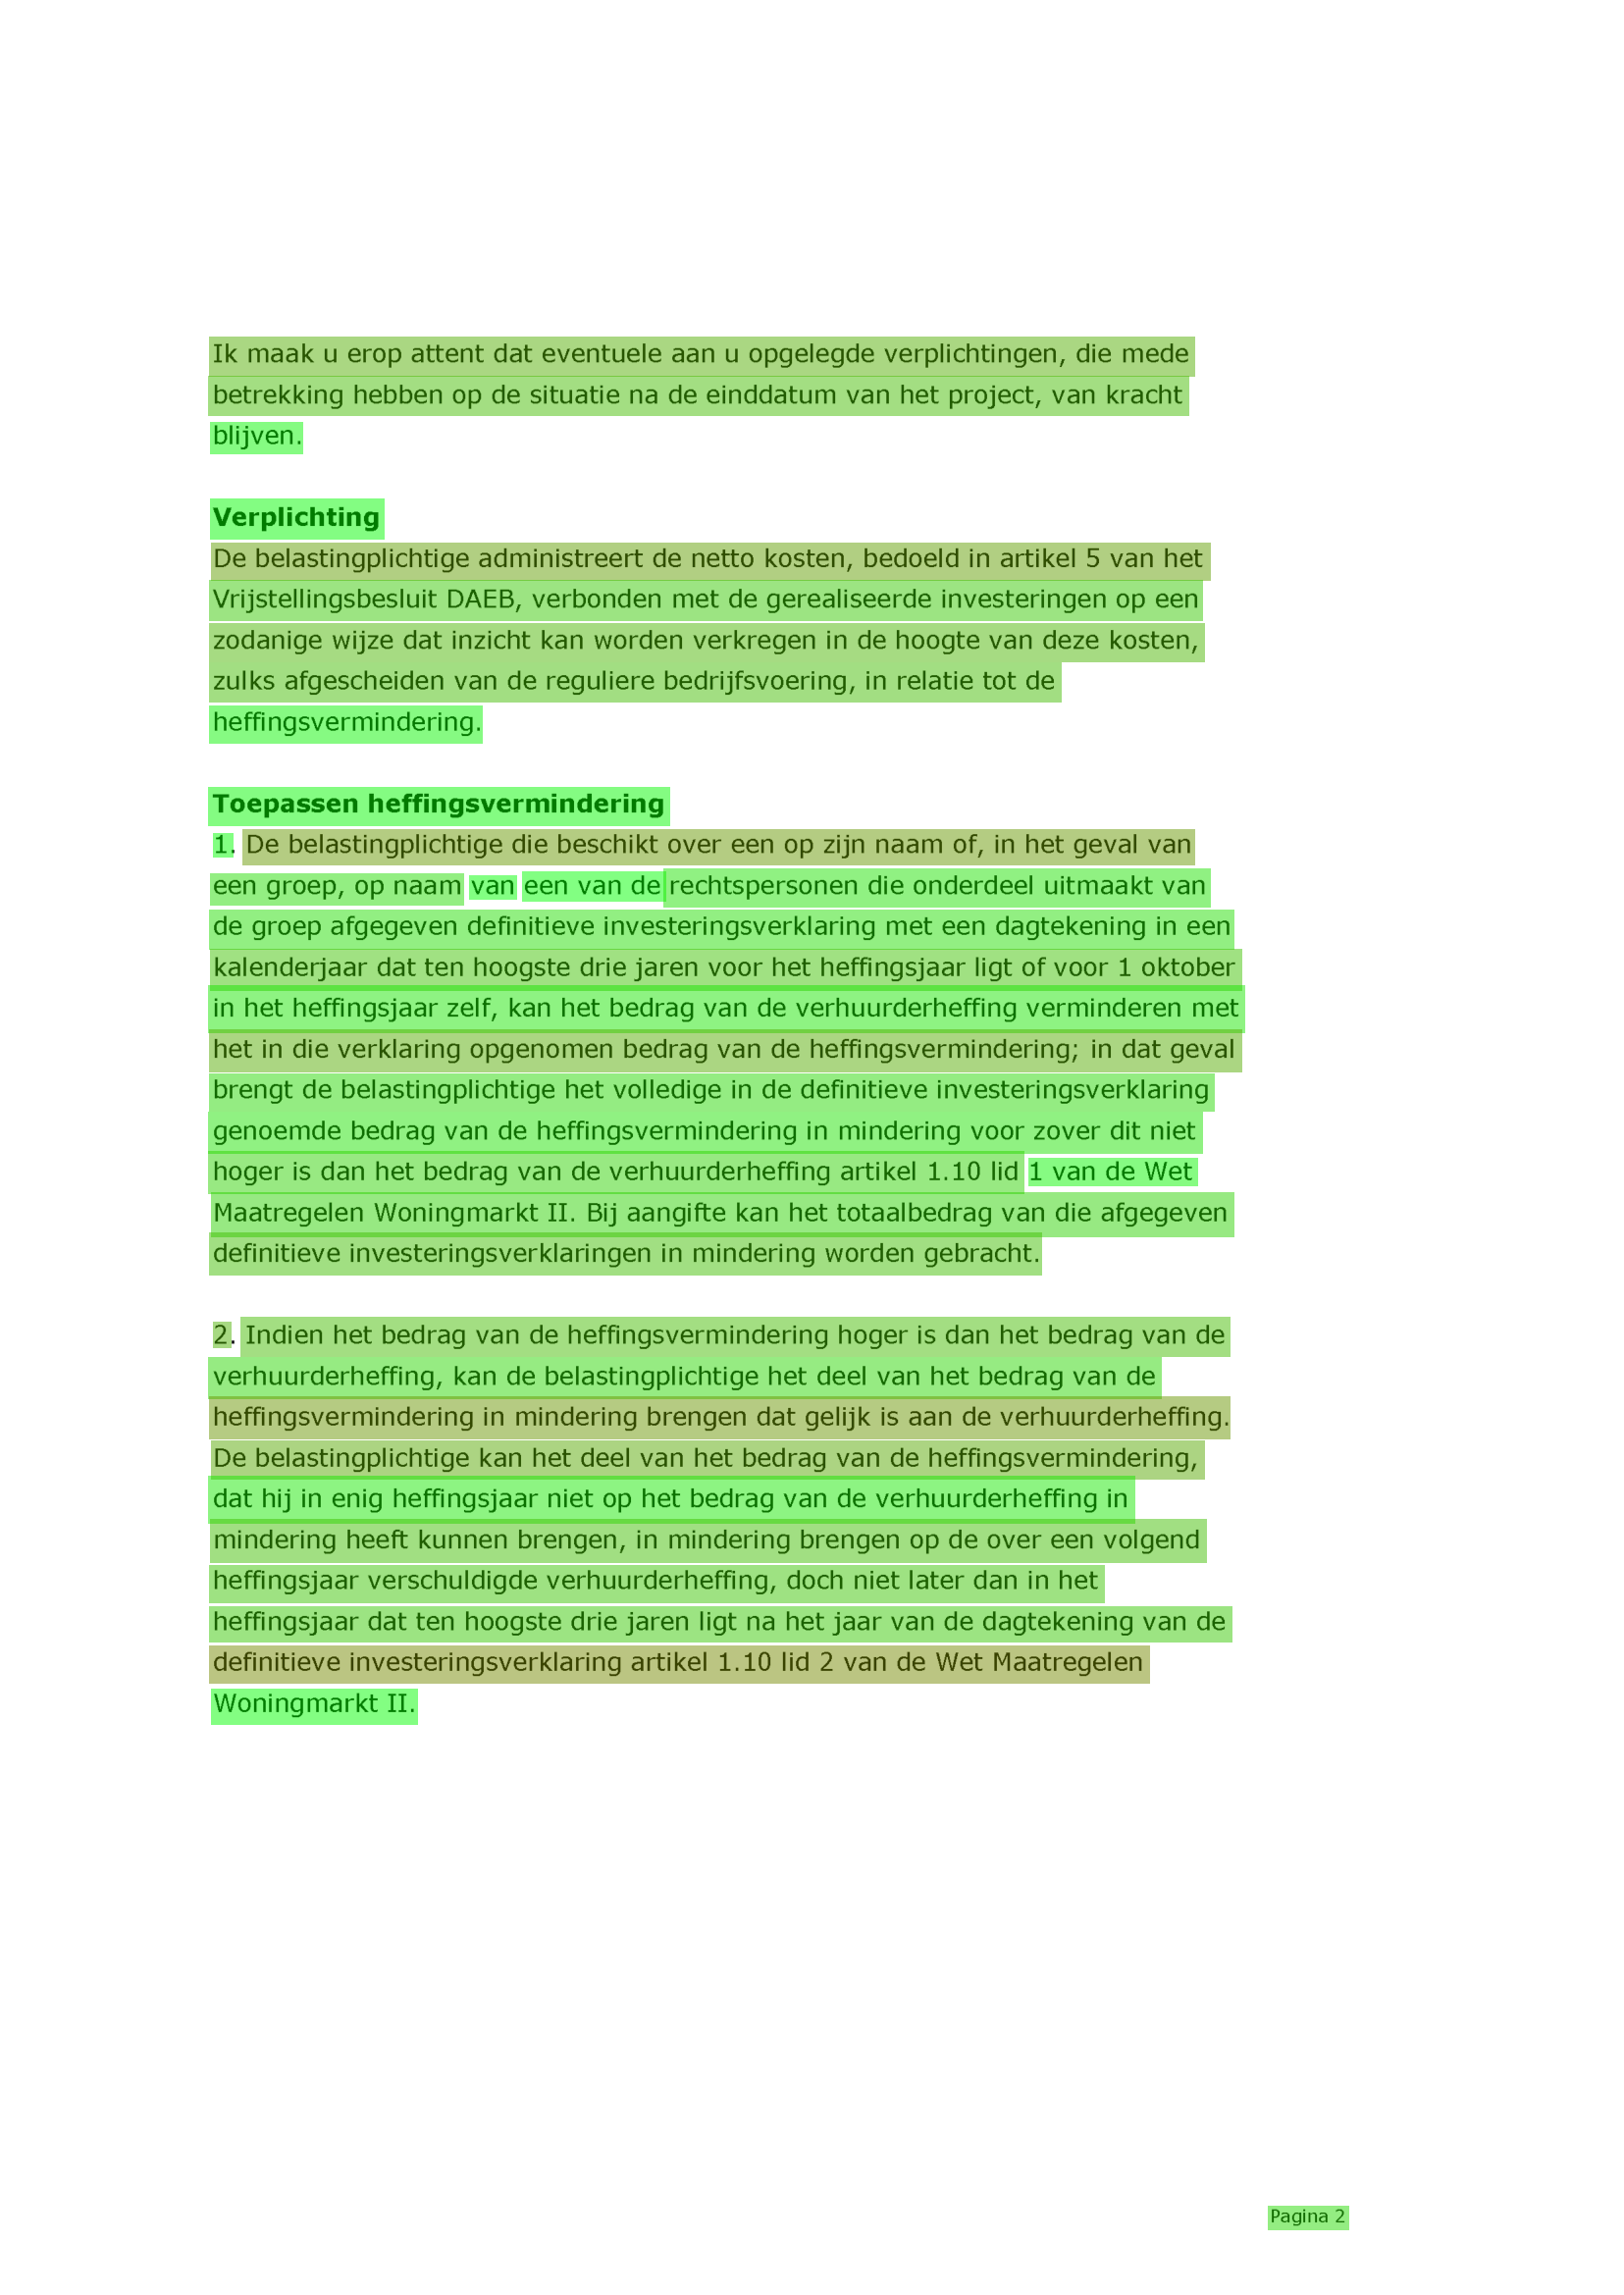

In [25]:
# As a double-check, we can draw those bounding boxes on the original image,
#   with color indicating that mentioned certainty. 
# This doesn't allow us to check the extracted text against the image text,
#   but it does usually highlight areas that confuse it or that it missed entirely.
wetsuite.extras.ocr.easyocr_draw_eval( chosen_example_image, page_ocr_results ) 

In [26]:
# If you only really care about the words on the page (e.g. for bag-of-words methods),
# then you can get away with forgetting all that structure, and pasting the fragments of text together, e.g.
fragment_list = list( text    for bbox, text, cert  in page_ocr_results)
page_text = '\n'.join(  fragment_list  )
print( page_text )

Ik maak u erop attent dat eventuele aan u opgelegde verplichtingen, die mede
betrekking hebben op de situatie na de einddatum van het project, van kracht
blijven.
Verplichting
De belastingplichtige administreert de netto kosten, bedoeld in artikel 5 van het
Vrijstellingsbesluit DAEB, verbonden met de gerealiseerde investeringen op een
zodanige wijze dat inzicht kan worden verkregen in de hoogte van deze kosten,
zulks afgescheiden van de reguliere bedrijfsvoering, in relatie tot de
heffingsvermindering.
Toepassen heffingsvermindering
1
De belastingplichtige die beschikt over een op zijn naam of, in het geval van
een groep, op naam
van
een van de
rechtspersonen die onderdeel uitmaakt van
de groep afgegeven definitieve investeringsverklaring met een dagtekening in een
kalenderjaar dat ten hoogste drie jaren voor het heffingsjaar ligt of voor 1 oktober
in het heffingsjaar zelf; kan het bedrag van de verhuurderheffing verminderen met
het in die verklaring opgenomen bedrag van de heffingsver

As you can see, it's not great at
having lines be lines, 
or knowing how to separate paragraphs,
and it includes words that _we_ would say are obviously header/footer rather than the body
(which can be a feature, but for large repeated headers is also messy)

Turning this into well-flowing text, takes a lot more care,
will always be an analytical and slightly creative process.

Some PDF-reading and PDF-converting software is better at this than others.
and you can get good at it software 


If you have a lot of data from the same source (which uses the same template),
you might even get it better for a mass of documents.

If you care to get into that, check out the code our `dataset-collect` companion repository that creates the kansspelautoriteit dataset
[currently here](https://github.com/WetSuiteLeiden/data-collection/blob/master/web_kansspelautoriteit.ipynb),
though note that notebook cares less about readability of the code, and more about the data it produces.

In general, it may not be worth your time.

----

### Choosing the functions to call.

Looking at those green boxes, you might imagine you can use the positioning to be smarter.
Taking more time and care to get cleaner text, by excluding headers and footers,
and figuring out paragraphs splits by the presence of whitespace.


...but sometimes you just care to extract the fact that words are in there at all,
and less about nice interpretation, in which case:

In [ ]:
### Quick and dirty PDF-text

# just one call, returns just one string. 
#   Tells you there is any text in there, but not e.g. that most pages are empty.
print( wetsuite.extras.pdf.doc_text( example_pdf_bytes ) )

In [29]:
### Quick and dirty OCR

# If you do not want to spend the time thinking about sentence fragments and bounding boxes,
#   there is this function that does OCR (so expect it to take minutes)
#   then dumbly joins all fragments without caring about paragraphs or spacing or anything like that.
print( wetsuite.extras.pdf.pdf_text_ocr( example_pdf_bytes ) )

Rijksdienst voor Ondernemend Nederland Retouradres Postbus 40219 8004 DE Zwolle Rijksdienst voor Ondernemend Nederland Vergunningen en handhaving Mandemaat 3, Assen Postbus 40219 8004 DE Zwolle WWW.rvo.nl Contactpersoon Woo-medewerker 0880 42 4242 woo-unit@rvo.nl Onze referentie Datum 29 maart 2023 Woo/2023/035 Betreft   Beslissing op verzoek Woo/2023/035 Bijlagen Relatienummer Geachte heer Op 15 februari 2023 heb ik uw verzoek ontvangen waarin vraagt om openbaarmaking van informatie. In deze brief leest u mijn reactie op uw verzoek. Uw verzoek U vraagt om openbaarmaking van informatie over de definitieve investeringsverklaring(en) verleend in verband met de verbouw van 220 woningen met projectnummer RVVN200264_ Procedure De ontvangst van uw verzoek is schriftelijk bevestigd bij brief van 17 februari 2023 met kenmerk Woo/2023/035 In deze brief is tevens de beslistermijn met twee weken verdaagd. Op 24 februari 2023 is er een opschortingsbrief aan u verzonden in verband met de zienswijze

In [ ]:
# TODO: add the less quick and dirty variants

# More PDF and OCR examples

== kst-31700-VIII-77-b1.pdf ==


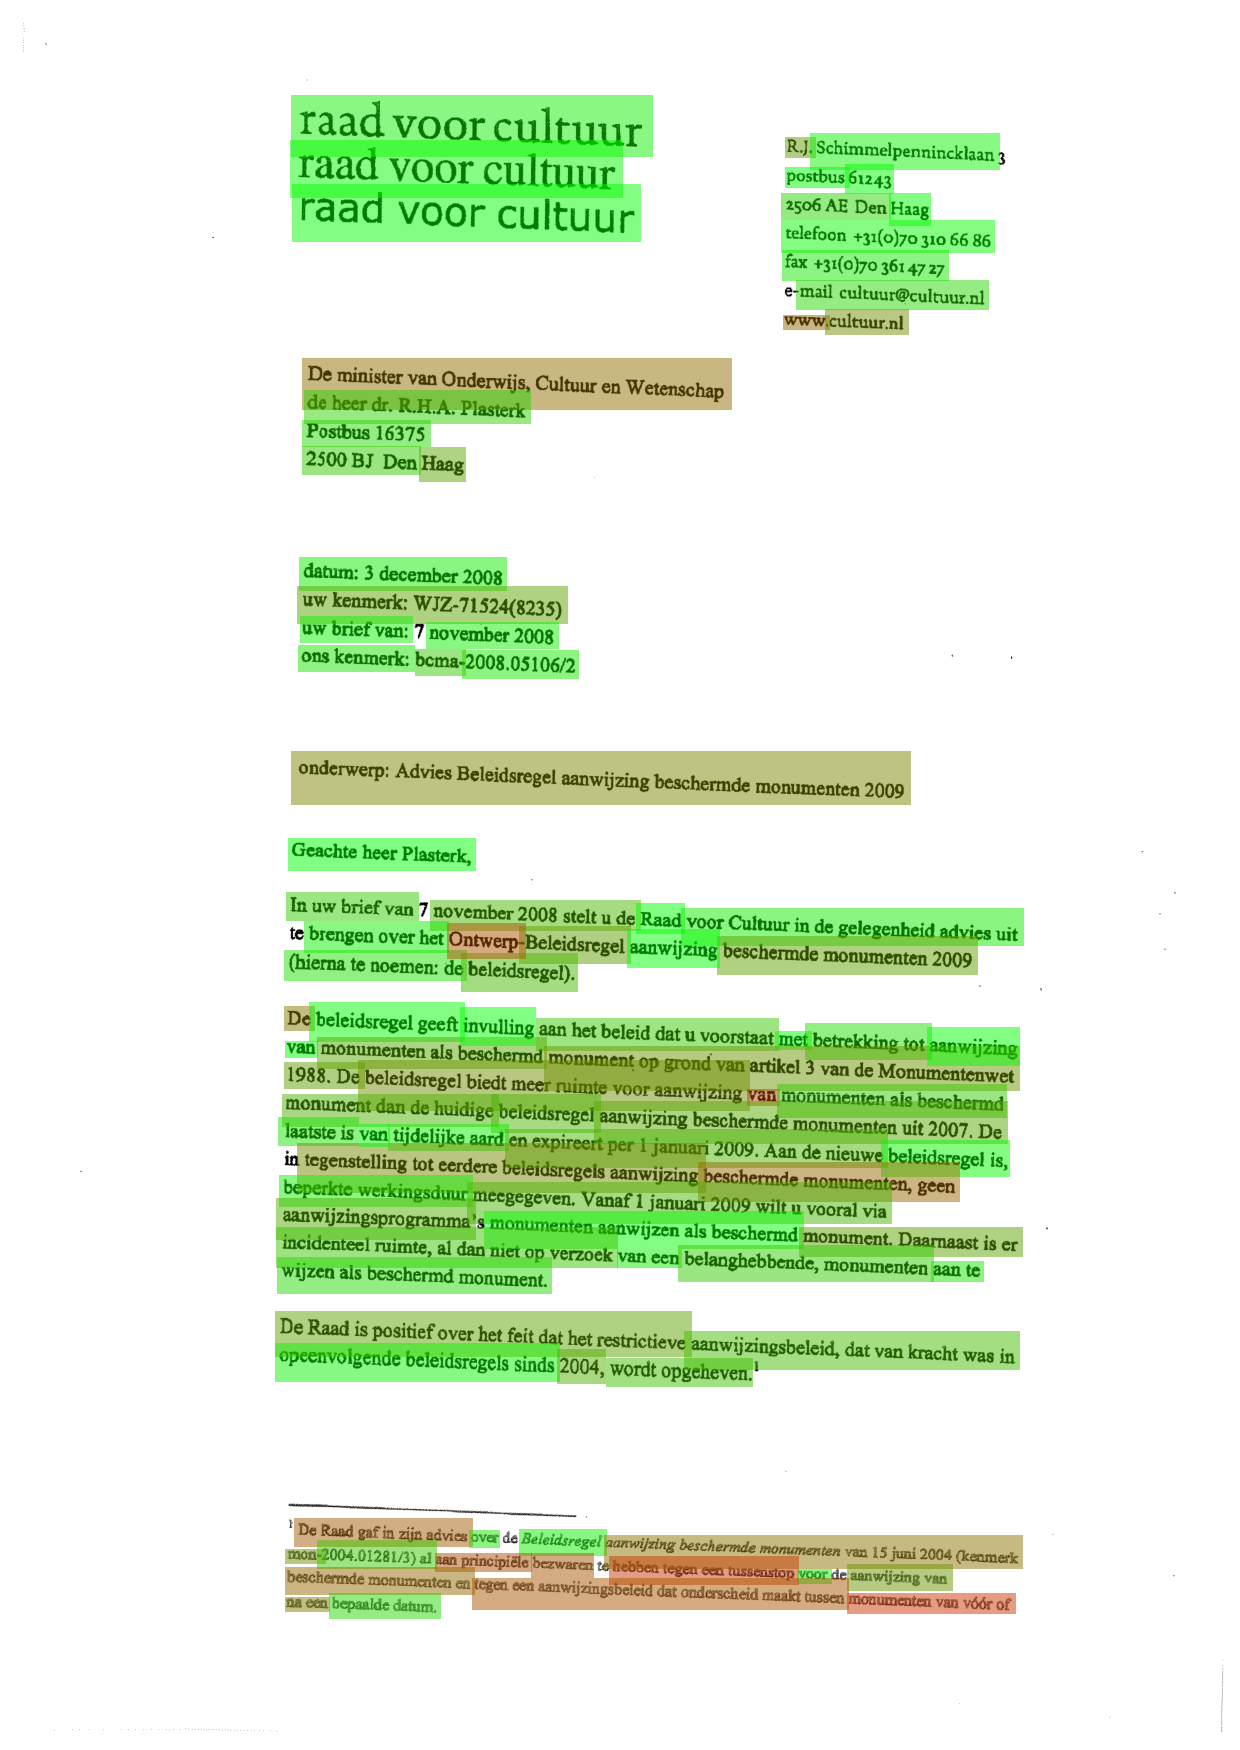

('raad voor cultuur\n'
 'RJ:\n'
 'Schimmelpennincklaan\n'
 'raad voor cultuur\n'
 'postbus\n'
 'raad voor cultuur\n'
 '2506 AE Den\n'
 'telefoon +31(0)7031066 86\n'
 'fax +31(0)70 3614727\n'
 'mail cultuur@cultuurn]\n'
 'WWW\n'
 'cultuur,nl\n'
 'De minister Yan Onderwijs, Cultuur en Wetenschap\n'
 'de beer d. RHA Plasterk\n'
 'Postbus 16375\n'
 '2500 BJ Den\n'
 'datum: 3 december 2008\n'
 'uw kenmerk: WJZ-71524(8235)\n'
 'uw brief van:\n'
 'povember 2008\n'
 'ons kcnmerk:\n'
 '2008,05106/2\n'
 'onderwerp: Advies Beleidsregel aanwizing beschermde monumenten 2009\n'
 'Gcachte heer Plasterk\n'
 'In uw brief van\n'
 'novcmber 2008 stelt u de\n'
 'brengen over het\n'
 'voor Cultuur in de gelegenheid advies uit\n'
 '(bierna te noemen: de\n'
 '~Beleidsrcgel\n'
 'bescherde monumenten 2009\n'
 'beleidsregel) .\n'
 'Dc\n'
 'beleidsregel geeft\n'
 'aan het beleid dat u voorstaat\n'
 'van\n'
 'motumenten als beschermd\n'
 'met\n'
 'betrekking tot =\n'
 '1988. De\n'
 'monumcnt op grond van artikel 

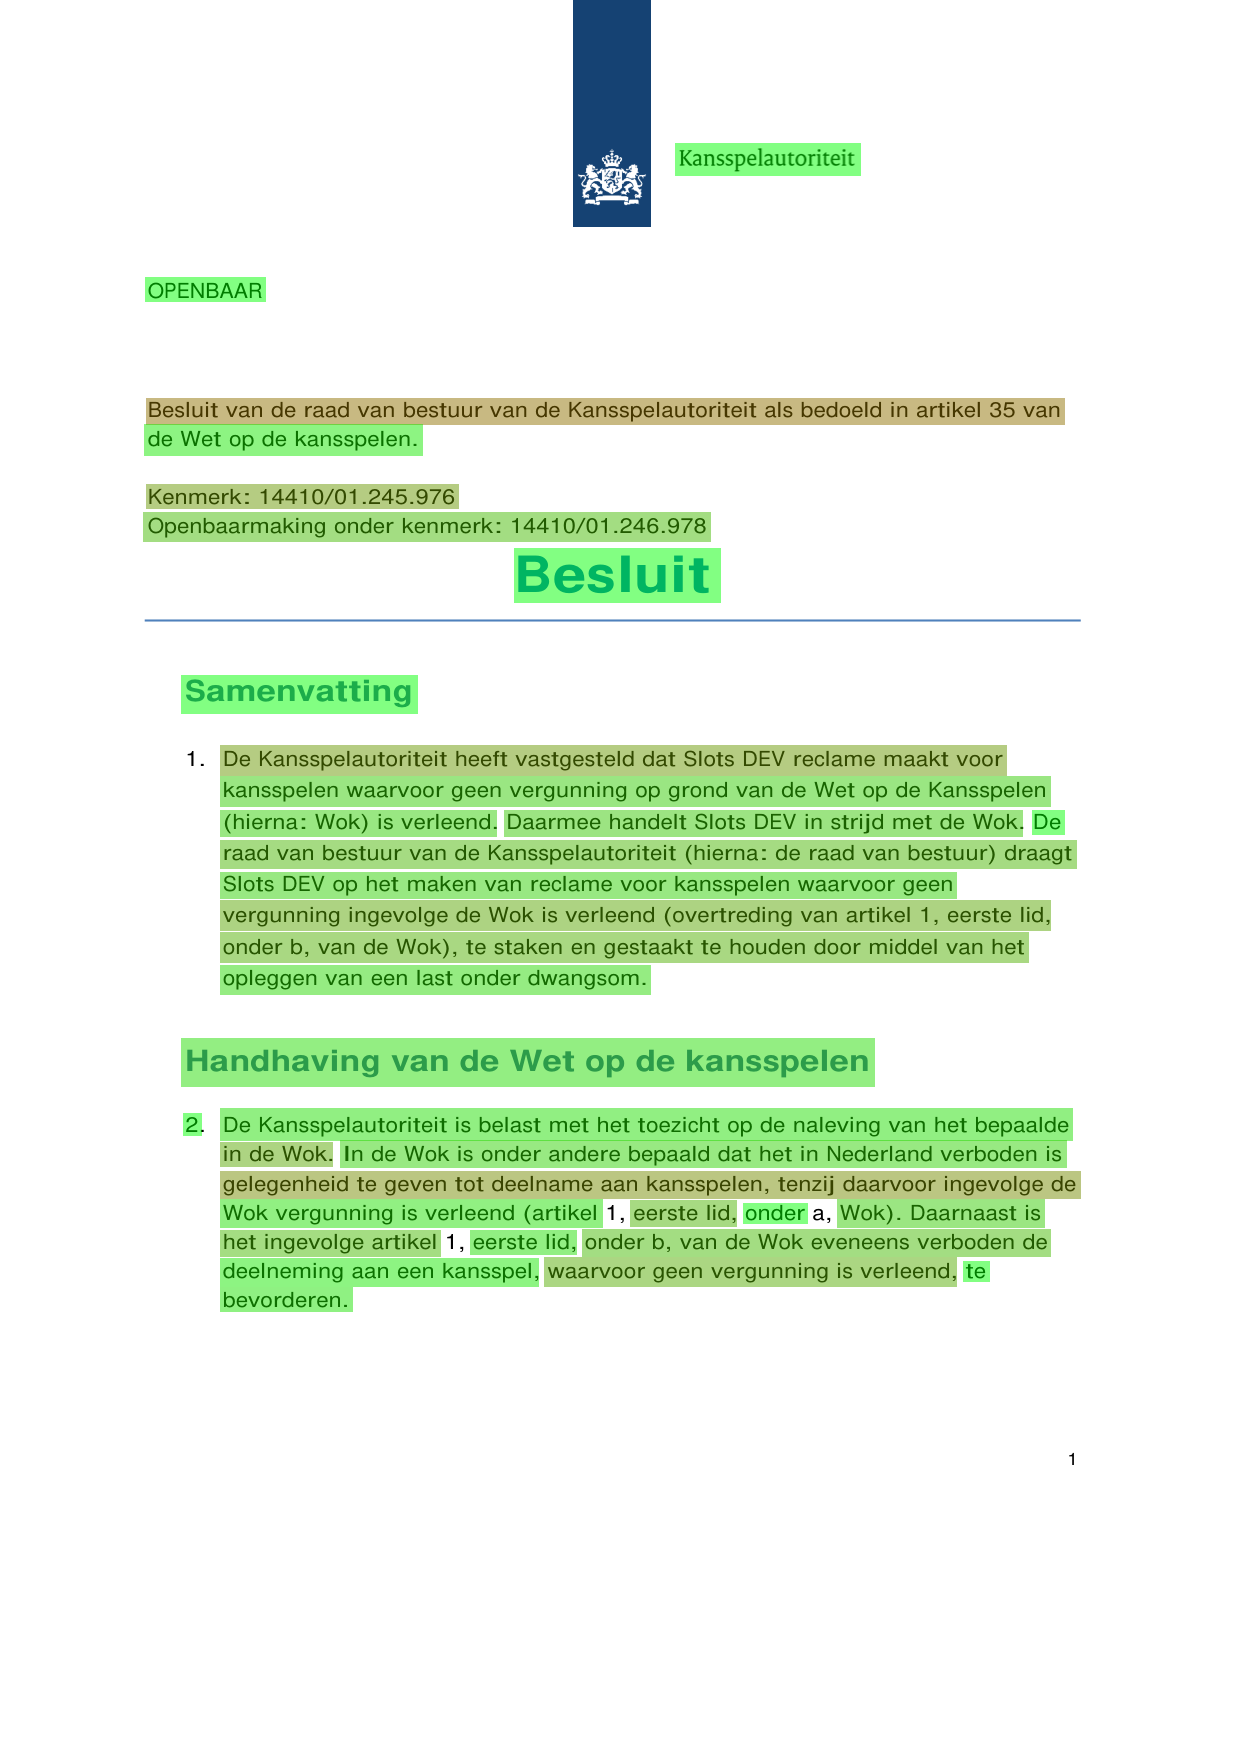

('Kansspelautoriteit\n'
 'OPENBAAR\n'
 'Besluit van de raad van bestuur van de Kansspelautoriteit als bedoeld in '
 'artikel 35 van\n'
 'de Wet op de kansspelen.\n'
 'Kenmerk: 14410/01.245.976\n'
 'Openbaarmaking onder kenmerk: 14410/01.246.978\n'
 'Besluit\n'
 'Samenvatting\n'
 'De Kansspelautoriteit heeft vastgesteld dat Slots DEV reclame maakt voor\n'
 'kansspelen waarvoor geen vergunning op grond van de Wet op de Kansspelen\n'
 '(hierna: Wok) is verleend_\n'
 'Daarmee handelt Slots DEV in strijd met de Wok\n'
 'De\n'
 'raad van bestuur van de Kansspelautoriteit (hierna: de raad van bestuur) '
 'draagt\n'
 'Slots DEV op het maken van reclame voor kansspelen waarvoor geen\n'
 'vergunning ingevolge de Wok is verleend (overtreding van artikel 1, eerste '
 'lid,\n'
 'onder b, van de Wok) , te staken en gestaakt te houden door middel van het\n'
 'opleggen van een last onder dwangsom.\n'
 'Handhaving van de Wet op de kansspelen\n'
 '2\n'
 'De Kansspelautoriteit is belast met het toezicht 

In [10]:
import pprint

test_urls = [
    'https://repository.overheid.nl/frbr/officielepublicaties/kst/31700-VIII/kst-31700-VIII-77-b1/1/pdf/kst-31700-VIII-77-b1.pdf', # non-straight image of text of not the best quality, that OCR makes a bunch of mistakes on

    'https://kansspelautoriteit.nl/publish/library/32/last_onder_dwangsom_slots_dev.pdf', # 1 page of text, the rest is images-of-text
    #'https://kansspelautoriteit.nl/publish/pages/5492/00_082_720_openbare_versie_last_onder_bestuursdwang.pdf', # 5 pages of images-of-text
    #'https://kansspelautoriteit.nl/publish/pages/5491/sanctiebesluit_wedwinkel.pdf', # 25 pages of images-of-text

    #'https://zoek.officielebekendmakingen.nl/trb-2022-72.pdf',
    #'https://zoek.officielebekendmakingen.nl/stb-2022-1.pdf',
    #'https://zoek.officielebekendmakingen.nl/stb-2000-5.pdf',
    #'https://zoek.officielebekendmakingen.nl/gmb-2022-385341.pdf',
    #'https://zoek.officielebekendmakingen.nl/stcrt-2019-42172.pdf',
    #'https://zoek.officielebekendmakingen.nl/prb-2022-10190.pdf',
    #'https://zoek.officielebekendmakingen.nl/wsb-2022-9718.pdf',
]


for url in test_urls:
    print( "== %s =="%wetsuite.helpers.format.url_basename( url ) )
    example_pdf_bytes = wetsuite.helpers.net.download(url)
    page_images = list( wetsuite.extras.pdf.pages_as_images(example_pdf_bytes) )

    for page_i, page_image in enumerate(page_images):
        #page_image.save('page_%03d.png'%(page_i+1))

        page_ocr_results = wetsuite.extras.ocr.easyocr( page_image )

        eval_image = wetsuite.extras.ocr.easyocr_draw_eval( page_image, page_ocr_results )
        #eval_image.save('page_%03d-boxes.png'%(page_i+1))
        display( eval_image )

        ocr_text = wetsuite.extras.ocr.easyocr_text( page_ocr_results )
        pprint.pprint( ocr_text )
        break # do first page of each
